In [340]:
from numpy import loadtxt, where, zeros, e, array, log, ones, append, linspace
from pylab import scatter, show, legend, xlabel, ylabel, contour, title
from scipy.optimize import fmin_powell
import numpy as np
import matplotlib.pyplot as plt
import math 
from numpy import newaxis, r_, c_, mat, e


In [274]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

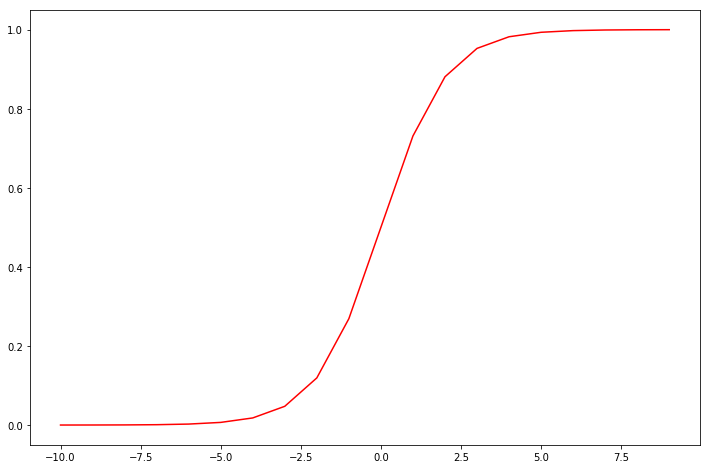

In [275]:
#checking for the functioning of sigmoid function
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(nums, sigmoid(nums), 'r') 
plt.show()


In [277]:
def map_feature(x1,x2):
    x1.shape = (x1.size,1)
    x2.shape = (x2.size,1)
    
    degree = 6
    out = ones(shape=(x1[:,0].size,1))
    m,n = out.shape
    for i in range(1,degree+1):
        for j in range(i+1):
            r = (x1**(i-j))*(x2**j)
            out = append(out,r,axis=1)
            
    return out

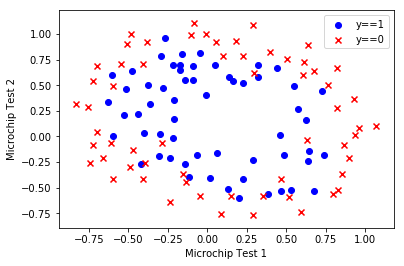

In [362]:
data = loadtxt('ex2data2.txt',delimiter=',')
X = data[:,0:2]
y = data[:,2]

pos = where(y==1)
neg = where(y==0)
scatter(X[pos,0],X[pos,1],marker ='o',c='b')
scatter(X[neg,0],X[neg,1],marker ='x',c='r')
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
legend(['y==1','y==0'])
show()
y.shape = (m, 1)

it = map_feature(X[:, 0], X[:, 1])
m,n = it.shape

In [377]:
def costFunctionReg(theta, X, y, lmd):
    m = X.shape[0]
    predictions = sigmoid(X.dot(theta.conj().T.transpose()))

    J = 1./m * (-y.T.dot(np.log(predictions)) - (1-y).T.dot(np.log(1 - predictions)))
    J_reg = lmd/(2*m) * (theta[1:] ** 2).sum()
    J += J_reg

    grad0 = 1/m * X.T[0] * (predictions - y)
    grad = 1/m * (X.T[1:] * (predictions - y) + lmd * [theta[1:]])
    grad = r_[grad0, grad]
    return J, grad


In [378]:
initial_theta = np.zeros((n,1))
l = 1
costFunctionReg(initial_theta,it,y,l)
print cost

ValueError: operands could not be broadcast together with shapes (27,118) (118,1) 

In [356]:
options = {'full_output': True} # fmin_powell

theta, cost, _, _, _, _ = \
        fmin_powell(lambda t: costFunctionReg(t, it, y, l),
                                initial_theta, **options)



ValueError: shapes (118,28) and (2,) not aligned: 28 (dim 1) != 2 (dim 0)

In [323]:

def predict(theta, X): 
    import numpy as np
    m = X.shape[0]
    p = np.zeros((m, 1))
    sigValue = sigmoid( np.dot(X,theta) )
    p = sigValue >= 0.5

    return p


In [324]:
p = predict(initial_theta, X)

print('Train Accuracy: {:f}'.format(np.mean(p == y) * 100))

Train Accuracy: 49.152542
